In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
import copy
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from nerfstudio.utils.eval_utils import eval_setup

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
os.chdir('/workspace')
MODEL_PATH = "/workspace/outputs/jackal_training_data_1/plane-nerf/2024-01-26_115109"

In [4]:
config_path = os.path.join(MODEL_PATH, "config.yml")
config, pipeline, checkpoint_path, _ = eval_setup(
                        Path(config_path),
                        test_mode="inference",
                    )

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/jackal_training_data_1/plane-nerf/2024-01-26_115109/nerfstudio_models/step-000009999.ckpt

In [5]:
#Camera object: generate_ray command to create
#RayBundle object

pipeline.eval()
pipeline.datamanager.setup_train()

for camera, batch in pipeline.datamanager.fixed_indices_train_dataloader:
    outputs = pipeline.model.get_outputs_for_camera(camera=camera)    
    break

Setting up training dataset...

Caching all 300 images.

Output()

torch.Size([720, 1280, 4])
torch.Size([720, 1280, 3])


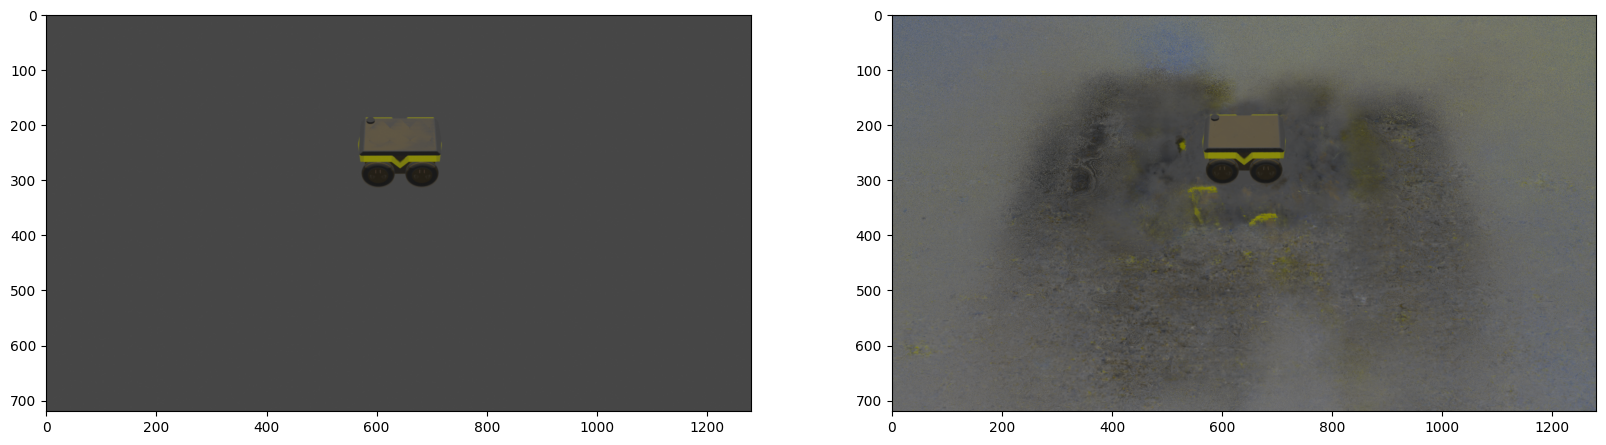

In [6]:
gt_rgb = batch["image"].to(pipeline.model.device)
predicted_rgb = outputs["rgb"]

print(gt_rgb.shape)
print(predicted_rgb.shape)

#Plot gt_rgb and predicted_rgb with matplotlib
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(gt_rgb.cpu().numpy())
plt.subplot(1, 2, 2)
plt.imshow(predicted_rgb.cpu().numpy())
plt.show()


In [7]:
print(pipeline.model.camera_optimizer.get_correction_matrices())

tensor([[[ 1.0000e+00, -1.8016e-03,  0.0000e+00, -1.8851e-03],
         [ 1.8016e-03,  1.0000e+00,  0.0000e+00,  9.7984e-03],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 1.0000e+00, -1.8771e-03,  0.0000e+00, -3.6252e-03],
         [ 1.8771e-03,  1.0000e+00,  0.0000e+00,  1.1421e-03],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 1.0000e+00, -3.0874e-04,  0.0000e+00, -5.5247e-03],
         [ 3.0874e-04,  1.0000e+00,  0.0000e+00,  3.2162e-03],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        ...,

        [[ 1.0000e+00,  2.1777e-03,  0.0000e+00, -1.9937e-03],
         [-2.1777e-03,  1.0000e+00,  0.0000e+00,  7.4318e-03],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 9.9999e-01,  3.3168e-03,  0.0000e+00, -5.8699e-04],
         [-3.3168e-03,  9.9999e-01,  0.0000e+00,  4.0767e-03],
         [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00]],

        [[ 9.9998e-01,  6.5146e

In [8]:
custom_camera = copy.deepcopy(camera)

R_t = np.zeros((1,3,4))
R_t[0,0,0] = 1
R_t[0,1,1] = 1
R_t[0,2,2] = 1
R_t[0,0,3] = 0.2
print(R_t)
custom_camera.camera_to_worlds = torch.from_numpy(R_t).float().to(pipeline.model.device)
print(custom_camera.camera_to_worlds)
print(camera.width,camera.height)
print(camera.cx,camera.cy)

outputs = pipeline.model.get_outputs_for_camera(camera=custom_camera)    

[[[1.  0.  0.  0.2]
  [0.  1.  0.  0. ]
  [0.  0.  1.  0. ]]]
tensor([[[1.0000, 0.0000, 0.0000, 0.2000],
         [0.0000, 1.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000]]], device='cuda:0')
tensor([[1280]], device='cuda:0') tensor([[720]], device='cuda:0')
tensor([[640.]], device='cuda:0') tensor([[360.]], device='cuda:0')


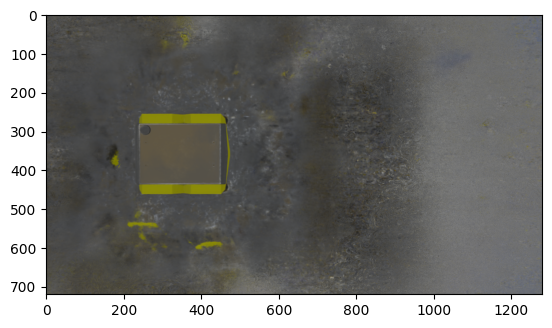

In [9]:
predicted_rgb = outputs["rgb"]
plt.imshow(predicted_rgb.cpu().numpy())
plt.show()
